In [7]:
import imageio
import matplotlib.pyplot as plt
from ipywidgets import interact
import numpy as np

In [1]:
from PIL import Image
im = Image.open('data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_1/1x1_f_28_50_mA_p_stim_1_MMStack_Pos0.ome.tif')
im.show()

In [11]:
# Function to display a frame
def show_frame(frame_index):
    im.seek(frame_index)  # Go to the specified frame
    plt.figure(figsize=(10, 8))
    plt.imshow(np.array(im), cmap='gray')
    plt.axis('off')
    plt.show()

# Assuming you have a way to determine the number of frames, use that here
number_of_frames = 250  # Update this with the correct number of frames

interact(show_frame, frame_index=(0, number_of_frames - 1))

interactive(children=(IntSlider(value=124, description='frame_index', max=249), Output()), _dom_classes=('widg…

<function __main__.show_frame(frame_index)>

In [13]:
import numpy as np
import tifffile as tiff
from skimage.feature import peak_local_max
from skimage.filters import gaussian


In [19]:
def load_tif_image(file_path):
    """Load a TIF file."""
    return tiff.imread(file_path)

def detect_roi(image_stack, sigma=1, threshold_rel=0.5):
    """
    Detect regions of interest (ROI) in an image stack where action potentials might occur.
    
    Args:
    - image_stack: A numpy array of shape (frames, height, width) representing the video.
    - sigma: Standard deviation for Gaussian blur to reduce noise.
    - threshold_rel: Relative threshold for detecting intensity peaks. Higher values mean fewer detections.
    
    Returns:
    - coordinates: A list of (x, y) tuples indicating detected ROI centers.
    """
    # Apply Gaussian blur to reduce noise
    blurred = gaussian(image_stack.mean(axis=0), sigma=sigma)
    
    # Detect local maxima
    coordinates = peak_local_max(blurred, threshold_rel=threshold_rel)
    
    return coordinates

def plot_detected_roi(image, coordinates):
    """Plot the first frame of the stack with detected ROI marked."""
    import matplotlib.pyplot as plt
    from matplotlib.patches import Circle
    
    plt.imshow(image, cmap='gray')
    for y, x in coordinates:
        plt.gca().add_patch(Circle((x, y), radius=5, linewidth=1, edgecolor='r', facecolor='none'))
    plt.show()

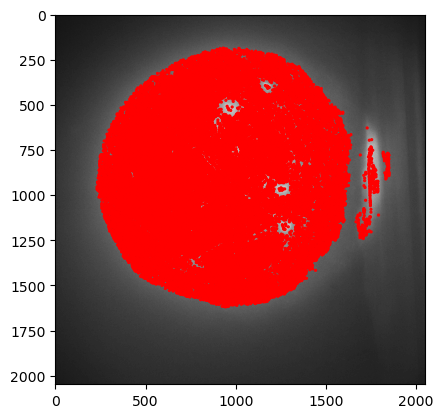

In [52]:
# Load the TIFF file
file_path = 'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_10/1x1_f_28_50_mA_p_stim_10_MMStack_Pos0.ome.tif'
image_stack = load_tif_image(file_path)

# Detect ROI
coordinates = detect_roi(image_stack)

# Plot the first frame with detected ROIs
plot_detected_roi(image_stack[0], coordinates)

In [21]:
import numpy as np

# Assuming image_stack is a NumPy array with shape (frames, height, width)
# Calculate the mean intensity for each frame
mean_intensities = np.mean(image_stack, axis=(1, 2))


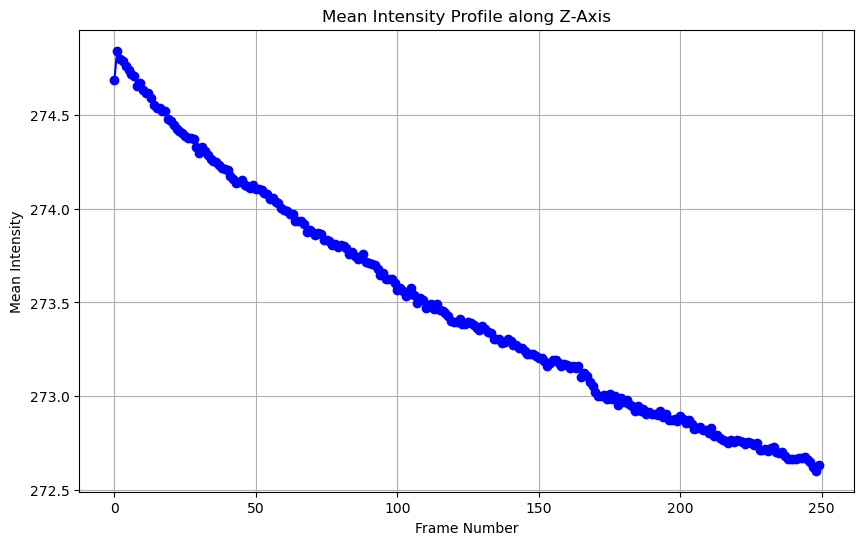

In [22]:
import matplotlib.pyplot as plt

# Generate frame numbers based on the number of frames
frame_numbers = np.arange(image_stack.shape[0])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(frame_numbers, mean_intensities, marker='o', linestyle='-', color='b')
plt.title('Mean Intensity Profile along Z-Axis')
plt.xlabel('Frame Number')
plt.ylabel('Mean Intensity')
plt.grid(True)
plt.show()


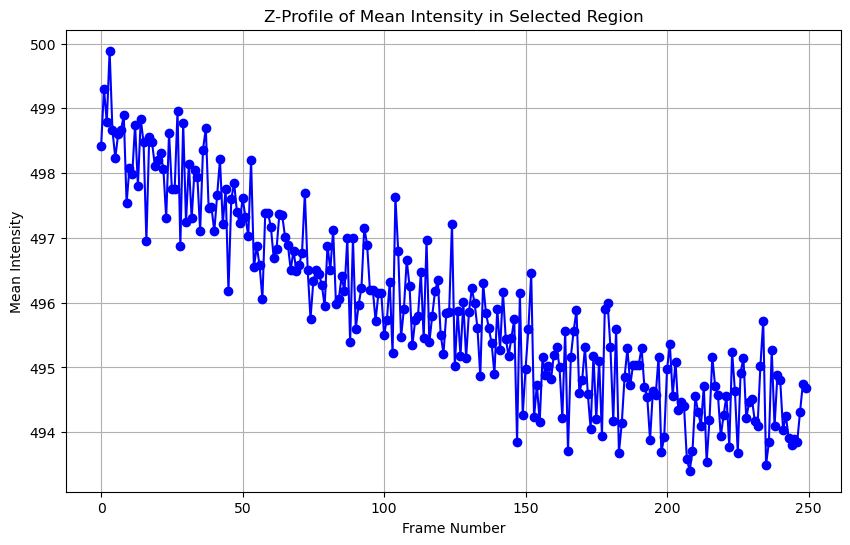

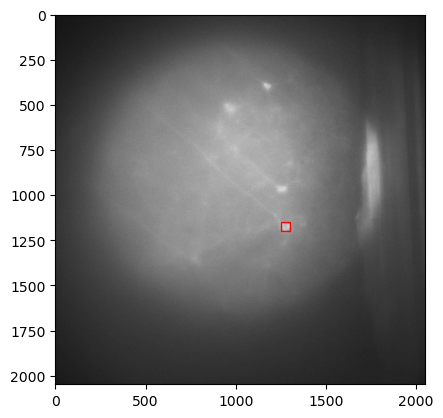

In [53]:

import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff


# Manually define the square region (top left corner x, y, and the size of the region)
top_left_x = 1250  # replace with your value
top_left_y = 1150  # replace with your value
region_size = 50  # replace with your value

# Initialize a list to store the mean intensity for each frame
mean_intensities = []

# Extract the region and calculate the mean intensity for each frame
for frame in image_stack:
    region = frame[top_left_y:top_left_y + region_size, top_left_x:top_left_x + region_size]
    mean_intensity = np.mean(region)
    mean_intensities.append(mean_intensity)

# Generate frame numbers
frame_numbers = np.arange(image_stack.shape[0])

# Plot the z-profile of mean intensity
plt.figure(figsize=(10, 6))
plt.plot(frame_numbers, mean_intensities, marker='o', linestyle='-', color='b')
plt.title('Z-Profile of Mean Intensity in Selected Region')
plt.xlabel('Frame Number')
plt.ylabel('Mean Intensity')
plt.grid(True)
plt.show()

# Plot the first frame with the square region highlighted
plt.imshow(image_stack[0], cmap='gray')
plt.gca().add_patch(plt.Rectangle((top_left_x, top_left_y), region_size, region_size, linewidth=1, edgecolor='r', facecolor='none'))
plt.show()



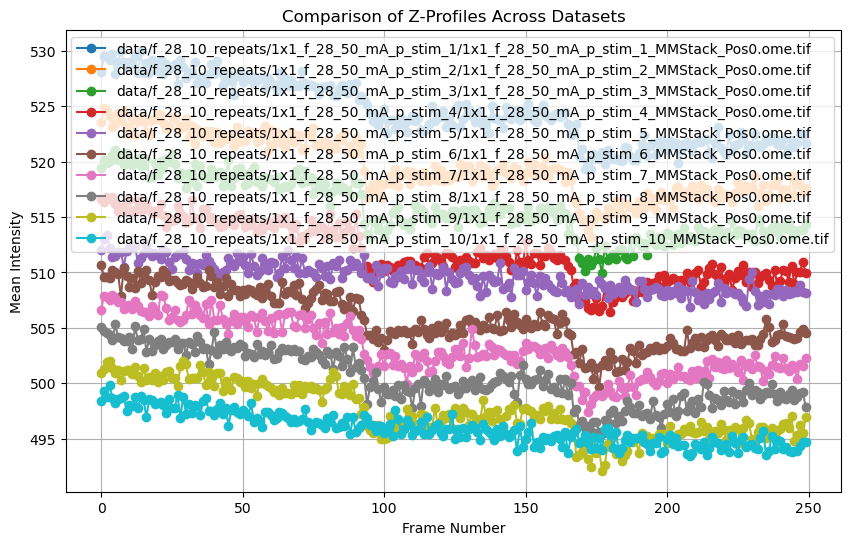

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tiff

# Define the list of TIFF files
tiff_files = [
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_1/1x1_f_28_50_mA_p_stim_1_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_2/1x1_f_28_50_mA_p_stim_2_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_3/1x1_f_28_50_mA_p_stim_3_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_4/1x1_f_28_50_mA_p_stim_4_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_5/1x1_f_28_50_mA_p_stim_5_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_6/1x1_f_28_50_mA_p_stim_6_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_7/1x1_f_28_50_mA_p_stim_7_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_8/1x1_f_28_50_mA_p_stim_8_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_9/1x1_f_28_50_mA_p_stim_9_MMStack_Pos0.ome.tif',
    'data/f_28_10_repeats/1x1_f_28_50_mA_p_stim_10/1x1_f_28_50_mA_p_stim_10_MMStack_Pos0.ome.tif',
]

# Manually define the square region (top left corner x, y, and the size of the region)
top_left_x = 1250
top_left_y = 1150
region_size = 50

# Initialize a dictionary to store the mean intensities for each dataset
mean_intensities_dict = {}

# Process each dataset
for idx, file_path in enumerate(tiff_files):
    # Load the TIFF file
    image_stack = tiff.imread(file_path)

    # Extract the region and calculate the mean intensity for each frame
    mean_intensities = [
        np.mean(frame[top_left_y:top_left_y + region_size, top_left_x:top_left_x + region_size])
        for frame in image_stack
    ]

    # Store the mean intensities in the dictionary
    mean_intensities_dict[file_path] = mean_intensities

# Plotting all the z-profiles
plt.figure(figsize=(10, 6))

# Generate frame numbers based on the length of the first dataset
frame_numbers = np.arange(len(next(iter(mean_intensities_dict.values()))))

# Plot each dataset's mean intensities
for file_path, mean_intensities in mean_intensities_dict.items():
    plt.plot(frame_numbers, mean_intensities, marker='o', linestyle='-', label=file_path)

plt.title('Comparison of Z-Profiles Across Datasets')
plt.xlabel('Frame Number')
plt.ylabel('Mean Intensity')
plt.legend()
plt.grid(True)
plt.show()


#1-4,6-9 has drop,5,10 doesnt

In [ ]:
#signal at the same place, activation map
#average the 10 dataset together
#deepinterpolation and more, use those metrics and quantify the difference between denoised and original data
#SNR, spatial spread, temporal shape and more, read the paper 
#there is a rise, but different frame in than the original data
#read deepinterpolation on how the denoising pic are not degrading the quality